In [56]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Solicitando dados via API e salvando em um csv

fiz isso para ser mais rapido e evitar sobrecarregar os servidores da prefeitura. 
Só precisa rodar essa parte uma vez

In [36]:
anos_referencia = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
meses_referencia = ['1','2','3','4','5','6','7','8','9','10','11','12']

dados_tabelados = []

for ano in anos_referencia:
    for mes in meses_referencia:
        requisicao = requests.get(f'https://sistemas.maua.sp.gov.br/Portaldatransparencia/API/Servidores/{mes}/{ano}')
        if requisicao.status_code == 200:
            servidores = requisicao.json()
            df_mes = pd.DataFrame(servidores)
            df_mes['mes'] = mes
            df_mes['ano'] = ano  
            dados_tabelados.append(df_mes)

df = pd.concat(dados_tabelados, ignore_index=True)

In [48]:
nomeArquivo = f"dados_{anos_referencia[0]}_{anos_referencia[-1]}.csv"

caminho = './dados/' + nomeArquivo
df.to_csv(caminho, index=False)

### Tratamento dos dados

In [49]:
df = pd.read_csv('./dados/dados_2015_2023.csv')

In [37]:
df.columns

Index(['cadastro', 'nome', 'secretaria', 'proventos', 'liquido', 'situacao',
       'vinculo', 'cargo', 'localabonocovid', 'abonocovid', 'horaextracovid',
       'mes', 'ano'],
      dtype='object')

In [38]:
df.dtypes

cadastro           object
nome               object
secretaria         object
proventos          object
liquido            object
situacao           object
vinculo            object
cargo              object
localabonocovid    object
abonocovid         object
horaextracovid     object
mes                object
ano                object
dtype: object

In [39]:
df['liquido'] = df['liquido'].astype(float)
df['proventos'] = df['proventos'].astype(float)
df['cadastro'] = df['cadastro'].astype(int)
df['abonocovid'] = df['abonocovid'].astype(int)
df['horaextracovid'] = df['horaextracovid'].astype(float)
df['ano'] = df['ano'].astype(str)
df['mes'] = df['mes'].astype(str)

In [40]:
df.dtypes

cadastro             int32
nome                object
secretaria          object
proventos          float64
liquido            float64
situacao            object
vinculo             object
cargo               object
localabonocovid     object
abonocovid           int32
horaextracovid     float64
mes                 object
ano                 object
dtype: object

In [41]:
df.head(2)

,cadastro,nome,secretaria,proventos,liquido,situacao,vinculo,cargo,localabonocovid,abonocovid,horaextracovid,mes,ano
0,33159,ABIGAIL MORAES DE SOUSA OLIVEIRA,Secretaria de Educação,1778.0,1464.63,Outra,Prazo Determinado,PROFESSOR I - JED I,N,0,0.0,1,2015
1,4000047,ABILIO MANOEL MATHIOLI,Secretaria de Cidadania e Ação Social,2600.0,1261.49,Outra,Conselheiros,CONSELHEIRO TUTELAR,N,0,0.0,1,2015


Gestões - fonte (https://www.maua.sp.gov.br/PerfilMunicipal/Prefeitos.aspx)


01/01/2013 a 31/12/2016 - Donisete Braga  
01/01/2017 a 31/12/2020 - Atila Jacomussi  
01/01/2021 a 31/12/2024 - Francisco Marcelo de Oliveira  


In [42]:
donisete = ['2015','2016']
atila = ['2017','2018','2019','2020']
marcelo = ['2021','2022','2023']

dfGestaoDonisete = df[df['ano'].isin(donisete)]
dfGestaoAtila = df[df['ano'].isin(atila)]
dfGestaoMarcelo = df[df['ano'].isin(marcelo)]

## Analise exploratoria

In [10]:
dfGestaoMarcelo.tail(2)

,cadastro,nome,secretaria,proventos,liquido,situacao,vinculo,cargo,localabonocovid,abonocovid,horaextracovid,mes,ano
627201,29874,ZULEIDE MARIA DA SILVA,Secretaria de Educação,5232.90,3443.07,Ativo,ESTAT EFETIVO,PEB I,N,0,0.0,7,2023
627202,33682,ZULEIDE MARIA DOS SANTOS EUFRASIO,Secretaria de Educação,4904.61,4091.43,Ativo,ESTAT EFETIVO,AUX. DESENV. INFANTIL III,N,0,0.0,7,2023


In [51]:
dfGestaoMarcelo.describe()

,cadastro,proventos,liquido,abonocovid,horaextracovid
count,2.039230e+05,203923.000000,203923.000000,203923.000000,203923.000000
mean,5.431335e+05,5081.505976,3827.905650,66.283646,6.694416
std,1.650358e+06,2997.986523,2146.640156,123.953579,68.850894
min,1.040000e+02,0.000000,-49421.420000,0.000000,0.000000
25%,2.066900e+04,3246.710000,2520.495000,0.000000,0.000000
50%,3.282200e+04,4335.150000,3367.780000,0.000000,0.000000
75%,3.935300e+04,6019.630000,4544.685000,0.000000,0.000000
max,9.000122e+06,46615.040000,29079.350000,900.000000,2404.250000


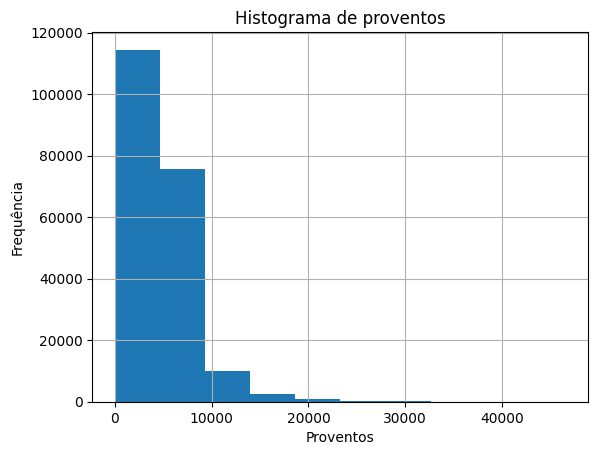

In [71]:
dfGestaoMarcelo['proventos'].hist()
plt.title(f'Histograma de proventos')
plt.xlabel('Proventos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

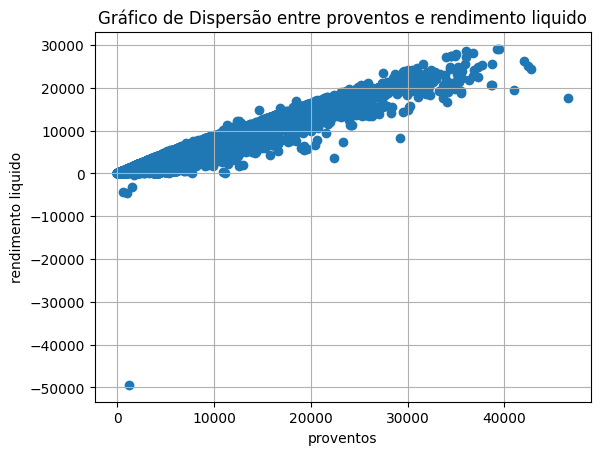

In [72]:
plt.scatter(dfGestaoMarcelo['proventos'], dfGestaoMarcelo['liquido'])

plt.title(f'Gráfico de Dispersão entre proventos e rendimento liquido')
plt.xlabel('proventos')
plt.ylabel('rendimento liquido')
plt.grid(True)
plt.show()

In [43]:
prefeito = df['cargo']=='PREFEITO'

dfPrefDonisete = dfGestaoDonisete.loc[prefeito]
dfPrefAtila = dfGestaoAtila.loc[prefeito]
dfPrefMarcelo = dfGestaoMarcelo.loc[prefeito]

In [33]:
dfPrefMarcelo

426657    True
432496    True
438269    True
444074    True
449937    True
455783    True
461785    True
467896    True
474071    True
480325    True
486568    True
492776    True
498917    True
505100    True
511425    True
517917    True
524584    True
531403    True
538244    True
544984    True
551813    True
558827    True
565967    True
573126    True
580322    True
587453    True
594631    True
601965    True
609348    True
616712    True
624102    True
Name: cargo, dtype: bool

### Esploratoria do salario dos prefeitos

In [ ]:
dfPrefDonisete.head(5)

In [19]:
mediaProventoPrefeito = dfPrefAtila['proventos'].mean()
medianaProventoPrefeito = dfPrefAtila['proventos'].median()
modaProventoPrefeito = dfPrefAtila['proventos'].mode()

print(f"Média dos Proventos Prefeito: {mediaProventoPrefeito:.2f}, Mediana: {medianaProventoPrefeito:.2f}, Moda: {modaProventoPrefeito.iloc[0]}")


Média dos Proventos Prefeito: 19772.27, Mediana: 18576.09, Moda: 18576.09


In [20]:
proventos_max = dfPrefAtila['proventos'].max()
proventos_min = dfPrefAtila['proventos'].min()

variacao_percentual = ((proventos_max - proventos_min) / proventos_min) * 100

print(f"Variação Percentual dos Proventos do Prefeito: {variacao_percentual:.2f}%")


Variação Percentual dos Proventos do Prefeito: 723.08%


In [21]:
proventos_max = dfPrefAtila['proventos'].max()
proventos_min = dfPrefAtila['proventos'].min()

variacao_proventos = proventos_max - proventos_min

print(f"Variação dos Proventos do Prefeito (Máximo - Mínimo): {variacao_proventos:.2f}")


Variação dos Proventos do Prefeito (Máximo - Mínimo): 58205.08


In [27]:
proventos_min = dfPrefAtila['proventos'].max()
proventos_min

66254.72

In [28]:
maximorecebido = dfGestaoAtila['proventos'] == 66254.72
dfPrefAtila.loc[maximorecebido]

,cadastro,nome,secretaria,proventos,liquido,situacao,vinculo,cargo,localabonocovid,abonocovid,horaextracovid,mes,ano
250081,34940,ATILA JACOMUSSI,Gabinete do Prefeito,66254.72,827.29,Outra,CARGO ELETIVO (PREF),PREFEITO,N,0,0.0,9,2018


### Analise da atual gestão

In [ ]:
tetoMunicipal = df[prefeito].iloc[0]['proventos']
liquidoPrefeito = df[prefeito].iloc[0]['liquido']

filtroProventos = df['proventos'] > tetoMunicipal
filtroLiquido = df['liquido'] > tetoMunicipal

In [ ]:
furadoresTeto = df[filtroProventos]

In [ ]:
procuradoriaGeral = furadoresTeto[furadoresTeto['cargo'] == 'PROCURADOR']
furadoresTeto = furadoresTeto.drop(procuradoriaGeral.index)

In [ ]:
furadoresTeto = furadoresTeto[['nome','proventos','liquido','secretaria','cadastro','cargo']]
furadoresTeto.columns = "nome servidor", "salario bruto", "salario liquido", "secretaria", "cadastro", "cargo"

## Solicitação de um mes unico

In [2]:
mesReferencia = '7' #['1','2','3','4','5','6','7','8','9','10','11','12']
anoReferencia = '2023' #['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [3]:
requisicao = requests.get('https://sistemas.maua.sp.gov.br/Portaldatransparencia/API/Servidores/' + mesReferencia + '/' + anoReferencia)

servidores = requisicao.json()
df = pd.DataFrame(servidores)

In [141]:
#for ano in anoReferencia:
#    for mes in mesReferencia:
#        requisicao = requests.get('https://sistemas.maua.sp.gov.br/Portaldatransparencia/API/Servidores/' + mes + '/' + ano)

#        servidores = requisicao.json()
#        df = pd.DataFrame(servidores)
        
#        df.to_csv('A:/code/analiseOrcamentoMaua/servidoresPrefMaua/dados' + mes + '_' + ano + '.csv')
        

In [4]:
df.describe()

,cadastro,nome,secretaria,proventos,liquido,situacao,vinculo,cargo,localabonocovid,abonocovid,horaextracovid
count,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399
unique,7399,7325,49,5021,6419,4,19,285,2,21,61
top,41146,MARIA APARECIDA DA SILVA,Secretaria de Educação,2103.32,2063.72,Ativo,ESTAT EFETIVO,PEB I,N,0,0
freq,1,4,3080,246,231,7248,5049,1233,5794,5822,7333


In [5]:
df.dtypes

cadastro           object
nome               object
secretaria         object
proventos          object
liquido            object
situacao           object
vinculo            object
cargo              object
localabonocovid    object
abonocovid         object
horaextracovid     object
dtype: object

In [6]:
df['liquido'] = df['liquido'].astype(float)
df['proventos'] = df['proventos'].astype(float)
df['cadastro'] = df['cadastro'].astype(int)
df['abonocovid'] = df['abonocovid'].astype(int)
df['horaextracovid'] = df['horaextracovid'].astype(float)

In [7]:
df.dtypes

cadastro             int32
nome                object
secretaria          object
proventos          float64
liquido            float64
situacao            object
vinculo             object
cargo               object
localabonocovid     object
abonocovid           int32
horaextracovid     float64
dtype: object

In [8]:
prefeito = df['cargo']=='PREFEITO'

In [9]:
df[prefeito]

,cadastro,nome,secretaria,proventos,liquido,situacao,vinculo,cargo,localabonocovid,abonocovid,horaextracovid
4298,38797,MARCELO OLIVEIRA,Gabinete do Prefeito,18576.09,13716.84,Ativo,CARGO ELETIVO (PREF),PREFEITO,N,0,0.0


In [10]:
tetoMunicipal = df[prefeito].iloc[0]['proventos']
liquidoPrefeito = df[prefeito].iloc[0]['liquido']

filtroProventos = df['proventos'] > tetoMunicipal
filtroLiquido = df['liquido'] > tetoMunicipal

In [11]:
df[filtroProventos].head()

,cadastro,nome,secretaria,proventos,liquido,situacao,vinculo,cargo,localabonocovid,abonocovid,horaextracovid
290,22727,ALEXANDRE SILVA,Secretaria de Finanças,31932.14,20792.77,Ativo,ESTAT EFETIVO,AUD.FISC.TRIB. MUNICIPAIS II,N,0,0.0
570,21246,ANDRE DE ARIMATEIA DE SOUZA LINO,Secretaria de Saúde,23061.77,14851.27,Ativo,ESTAT EFETIVO,MEDICO-CIRURGIAO GERAL 40H,S,300,0.0
590,18409,ANDREA CHAVES FERREIRA SANTO AZZOLINI,Secretaria de Saúde,25615.00,18716.83,Ativo,ESTAT EFETIVO,MEDICO-GINECOLOGISTA 40H,S,300,0.0
688,12745,ANGELA MARIA BARADEL,Secretaria de Finanças,23688.94,15711.33,Ativo,ESTAT EFETIVO,AUDITOR FISC. TRIB. MUNICIPAIS,N,0,0.0
769,2943,ANTONIO MARIA CLARET SANT ANA,Secretaria de Meio Ambiente,19001.00,13419.10,Ativo,CLT Ñ ESTAVEL,ENGENHEIRO AGRONOMO,N,0,0.0


In [12]:
furadoresTeto = df[filtroProventos]

In [13]:
furadoresTeto.count()

cadastro           74
nome               74
secretaria         74
proventos          74
liquido            74
situacao           74
vinculo            74
cargo              74
localabonocovid    74
abonocovid         74
horaextracovid     74
dtype: int64

In [14]:
furadoresTeto.describe()

,cadastro,proventos,liquido,abonocovid,horaextracovid
count,74.000000,74.000000,74.000000,74.000000,74.0
mean,19823.486486,23715.790405,15826.860270,60.810811,0.0
std,10349.539152,4766.360575,3250.383718,121.427094,0.0
min,2118.000000,18652.080000,9419.890000,0.000000,0.0
25%,12719.250000,19942.597500,13716.840000,0.000000,0.0
50%,17908.000000,22750.565000,15165.770000,0.000000,0.0
75%,26586.250000,25673.912500,17600.387500,0.000000,0.0
max,41764.000000,42732.730000,24486.930000,300.000000,0.0


In [15]:
procuradoriaGeral = furadoresTeto[furadoresTeto['cargo'] == 'PROCURADOR']

In [16]:
furadoresTeto = furadoresTeto.drop(procuradoriaGeral.index)


In [17]:
furadoresTeto.count()

cadastro           70
nome               70
secretaria         70
proventos          70
liquido            70
situacao           70
vinculo            70
cargo              70
localabonocovid    70
abonocovid         70
horaextracovid     70
dtype: int64

In [18]:
furadoresTeto = furadoresTeto[['nome','proventos','liquido','secretaria','cadastro','cargo']]
furadoresTeto.columns = "nome servidor", "salario bruto", "salario liquido", "secretaria", "cadastro", "cargo"

In [19]:
furadoresTeto.head()

,nome servidor,salario bruto,salario liquido,secretaria,cadastro,cargo
290,ALEXANDRE SILVA,31932.14,20792.77,Secretaria de Finanças,22727,AUD.FISC.TRIB. MUNICIPAIS II
570,ANDRE DE ARIMATEIA DE SOUZA LINO,23061.77,14851.27,Secretaria de Saúde,21246,MEDICO-CIRURGIAO GERAL 40H
590,ANDREA CHAVES FERREIRA SANTO AZZOLINI,25615.00,18716.83,Secretaria de Saúde,18409,MEDICO-GINECOLOGISTA 40H
688,ANGELA MARIA BARADEL,23688.94,15711.33,Secretaria de Finanças,12745,AUDITOR FISC. TRIB. MUNICIPAIS
769,ANTONIO MARIA CLARET SANT ANA,19001.00,13419.10,Secretaria de Meio Ambiente,2943,ENGENHEIRO AGRONOMO


In [22]:
furadoresTeto.to_csv(r'.\servidoresPrefMaua\furadoresTeto-mes7.csv')

### Existe servidores duplicados?

In [23]:
servidorCadNome = df[['cadastro','nome','situacao','vinculo','secretaria','cargo','proventos','liquido']]

In [24]:
servidorCadNome.head()

,cadastro,nome,situacao,vinculo,secretaria,cargo,proventos,liquido
0,41146,ABELARDO DE LIMA RODRIGUES,Ativo,ESTAT EFETIVO,Secretaria de Governo,ASSISTENTE ADM I,3880.01,2806.85
1,33545,ABILENE SILVA NOGUEIRA,Ativo,ESTAT EFETIVO,Secretaria de Educação,AUX. DESENV. INFANTIL IV,3859.74,2387.81
2,39269,ABRAAO FRANCISCO DA COSTA,Ativo,ESTAT COMISS,Gabinete do Prefeito,ASSESSOR ESPECIAL,12099.86,8834.92
3,35744,ACACIO JOARI BELLI,Ativo,ESTAT EFETIVO,Secretaria de Planejamento Urbano,A.F.A.U. MUNICIPAIS I,10827.67,8256.98
4,9000084,ADAILTON DE SOUZA SOARES JUNIOR,Ativo,GCM Aluno,Secretaria de Segurança Pública,GCM ALUNO,1736.40,1736.40


In [25]:
semRepedidos = servidorCadNome['nome'].drop_duplicates().count()
todos = servidorCadNome['nome'].count()

print(todos - semRepedidos)

74


In [26]:
servidoresDuplicados = servidorCadNome.duplicated('nome', False)


In [27]:
servidorCadNome = servidorCadNome.assign(repetido = servidoresDuplicados)

In [28]:
servidorCadNome.head()

,cadastro,nome,situacao,vinculo,secretaria,cargo,proventos,liquido,repetido
0,41146,ABELARDO DE LIMA RODRIGUES,Ativo,ESTAT EFETIVO,Secretaria de Governo,ASSISTENTE ADM I,3880.01,2806.85,False
1,33545,ABILENE SILVA NOGUEIRA,Ativo,ESTAT EFETIVO,Secretaria de Educação,AUX. DESENV. INFANTIL IV,3859.74,2387.81,False
2,39269,ABRAAO FRANCISCO DA COSTA,Ativo,ESTAT COMISS,Gabinete do Prefeito,ASSESSOR ESPECIAL,12099.86,8834.92,False
3,35744,ACACIO JOARI BELLI,Ativo,ESTAT EFETIVO,Secretaria de Planejamento Urbano,A.F.A.U. MUNICIPAIS I,10827.67,8256.98,False
4,9000084,ADAILTON DE SOUZA SOARES JUNIOR,Ativo,GCM Aluno,Secretaria de Segurança Pública,GCM ALUNO,1736.40,1736.40,False


In [29]:
repetido = servidorCadNome['repetido']== True
servidoresRepetidos = servidorCadNome[repetido]


In [30]:
servidoresRepetidos['nome'].count()

145

In [31]:
servidoresRepetidos.head()

,cadastro,nome,situacao,vinculo,secretaria,cargo,proventos,liquido,repetido
40,41254,ADILSON DOS SANTOS NASCIMENTO,Ativo,ESTAT EFETIVO,Secretaria de Educação,PEB II - AEE,3210.00,1858.76,True
41,36137,ADILSON DOS SANTOS NASCIMENTO,Ativo,ESTAT EFETIVO,Secretaria de Educação,PEB I,4655.13,3706.79,True
102,41770,ADRIANA OLIVEIRA DOS SANTOS,Ativo,ESTAT EFETIVO,Secretaria de Administração e Modernização,TECNICO ADMINISTRATIVO I,5491.38,4390.42,True
103,29050,ADRIANA OLIVEIRA DOS SANTOS,Ativo,ESTAT EFETIVO,Secretaria de Educação,PEB I,6346.92,3656.20,True
108,8007874,ADRIANA RODRIGUES DA SILVA,Ativo,EVENTUAL,Secretaria de Educação,PEB I,2471.33,2268.72,True


In [32]:
servidoresRepetidos = servidoresRepetidos[['cadastro','nome','situacao','cargo','vinculo','secretaria','proventos','liquido']]
servidoresRepetidos.columns = [['cadastro','nome servidor','situacao','cargo','vinculo','secretaria','salario bruto','salario liquido']]

In [33]:
servidoresRepetidos.head()

,cadastro,nome servidor,situacao,cargo,vinculo,secretaria,salario bruto,salario liquido
40,41254,ADILSON DOS SANTOS NASCIMENTO,Ativo,PEB II - AEE,ESTAT EFETIVO,Secretaria de Educação,3210.00,1858.76
41,36137,ADILSON DOS SANTOS NASCIMENTO,Ativo,PEB I,ESTAT EFETIVO,Secretaria de Educação,4655.13,3706.79
102,41770,ADRIANA OLIVEIRA DOS SANTOS,Ativo,TECNICO ADMINISTRATIVO I,ESTAT EFETIVO,Secretaria de Administração e Modernização,5491.38,4390.42
103,29050,ADRIANA OLIVEIRA DOS SANTOS,Ativo,PEB I,ESTAT EFETIVO,Secretaria de Educação,6346.92,3656.20
108,8007874,ADRIANA RODRIGUES DA SILVA,Ativo,PEB I,EVENTUAL,Secretaria de Educação,2471.33,2268.72


In [36]:
servidoresRepetidos.to_csv(r'.\servidoresPrefMaua\servidoresRepetidos-mes7.csv')

In [37]:
servidoresRepetidos[servidoresRepetidos['situacao'] != 'Ativo']

,cadastro,nome servidor,situacao,cargo,vinculo,secretaria,salario bruto,salario liquido
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7273,NaN,NaN,Outra,NaN,NaN,NaN,NaN,NaN
7325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
somarRepetidos = servidoresRepetidos[['cadastro','nome','secretaria','cargo','proventos','liquido']]
somarRepetidos.reset_index()

KeyError: "['nome' 'proventos' 'liquido'] not in index"

In [40]:
i = 0
salariosLiquidos = []
salariosBrutos = []
servidoresNomes = []
secretaria = []
cadastro1 = []
cadastro2 = []
cargo1 = []
cargo2 = []

for linha in somarRepetidos['nome']:
    if(i< somarRepetidos['nome'].count()-1):
        if (somarRepetidos.iloc[i]['nome'] == somarRepetidos.iloc[i+1]['nome']):
            bruto = somarRepetidos.iloc[i]['proventos']+somarRepetidos.iloc[i+1]['proventos']
            liquido = somarRepetidos.iloc[i]['liquido']+somarRepetidos.iloc[i+1]['liquido']
            salariosBrutos.append(float(round(bruto,2)))
            salariosLiquidos.append(float(round(liquido,2)))
            servidoresNomes.append(str(somarRepetidos.iloc[i]['nome']))
            secretaria.append(str(somarRepetidos.iloc[i]['secretaria']))
            cadastro1.append(str(somarRepetidos.iloc[i]['cadastro']))
            cadastro2.append(str(somarRepetidos.iloc[i+1]['cadastro']))
            cargo1.append(str(somarRepetidos.iloc[i]['cargo']))
            cargo2.append(str(somarRepetidos.iloc[i+1]['cargo']))
    i = i + 1
    

NameError: name 'somarRepetidos' is not defined

In [41]:
salariosBrutos = np.array(salariosBrutos)
salariosLiquidos = np.array(salariosLiquidos)
servidoresNomes = np.array(servidoresNomes)
secretaria = np.array(secretaria)
cadastro1 = np.array(cadastro1)
cadastro2 = np.array(cadastro2)
cargo1 = np.array(cargo1)
cargo2 = np.array(cargo2)

In [42]:
servidoresNomes = pd.DataFrame(servidoresNomes, columns=['nome'])
salariosLiquidos = pd.DataFrame(salariosLiquidos, columns=['liquido'])
salariosBrutos = pd.DataFrame(salariosBrutos, columns=['bruto'])
secretaria = pd.DataFrame(secretaria, columns=['secretaria'])
cadastro1 = pd.DataFrame(cadastro1, columns=['cadastro1'])
cadastro2 = pd.DataFrame(cadastro2, columns=['cadastro2'])
cargo1 = pd.DataFrame(cargo1, columns=['cargo1'])
cargo2 = pd.DataFrame(cargo2, columns=['cargo2'])

In [43]:
servidoresRepedidosSomados = pd.merge(servidoresNomes,salariosBrutos, left_index= True , right_index= True)
servidoresRepedidosSomados = pd.merge(servidoresRepedidosSomados,salariosLiquidos, left_index= True , right_index= True)
servidoresRepedidosSomados = pd.merge(servidoresRepedidosSomados,secretaria, left_index= True , right_index= True)
servidoresRepedidosSomados = pd.merge(servidoresRepedidosSomados,cadastro1, left_index= True , right_index= True)
servidoresRepedidosSomados = pd.merge(servidoresRepedidosSomados,cadastro2, left_index= True , right_index= True)
servidoresRepedidosSomados = pd.merge(servidoresRepedidosSomados,cargo1, left_index= True , right_index= True)
servidoresRepedidosSomados = pd.merge(servidoresRepedidosSomados,cargo2, left_index= True , right_index= True)

In [44]:
servidoresRepedidosSomados.head()

,nome,bruto,liquido,secretaria,cadastro1,cadastro2,cargo1,cargo2


In [46]:
servidoresRepedidosSomados.columns = "Nome do Servidor","Salario Bruto","Salario Liquido", "Secretaria no 1º Cadastro", "1º Cadastro", "2º Cadastro","Cargo 1º Cad","Cargo 2º Cad"
servidoresRepedidosSomados.to_csv(r'.\servidoresPrefMaua\servidorRepetidos-mes7.csv')

In [48]:
filtroProventos = servidoresRepedidosSomados['Salario Bruto'] > tetoMunicipal
filtroLiquidos = servidoresRepedidosSomados['Salario Liquido'] > liquidoPrefeito

In [49]:
df_servidoresRepetidos_105_bruto = servidoresRepedidosSomados[filtroProventos]
df_servidoresRepetidos_105_liquido = servidoresRepedidosSomados[filtroLiquidos]

In [50]:
df_servidoresRepetidos_105_liquido.columns = "Nome do Servidor","Salario Bruto","Salario Liquido", "Secretaria no 1º Cadastro", "1º Cadastro", "2º Cadastro","Cargo 1º Cad","Cargo 2º Cad"
df_servidoresRepetidos_105_bruto.columns = "Nome do Servidor","Salario Bruto","Salario Liquido", "Secretaria no 1º Cadastro", "1º Cadastro", "2º Cadastro","Cargo 1º Cad","Cargo 2º Cad"

In [45]:
df_servidoresRepetidos_105_liquido.to_csv(r'A:\code\analiseOrcamentoMaua\servidoresPrefMaua\servidorLiquidos105.csv')


In [51]:
df_servidoresRepetidos_105_bruto

,Nome do Servidor,Salario Bruto,Salario Liquido,Secretaria no 1º Cadastro,1º Cadastro,2º Cadastro,Cargo 1º Cad,Cargo 2º Cad


In [47]:
df_servidoresRepetidos_105_bruto.count()

Nome do Servidor             15
Salario Bruto                15
Salario Liquido              15
Secretaria no 1º Cadastro    15
1º Cadastro                  15
2º Cadastro                  15
Cargo 1º Cad                 15
Cargo 2º Cad                 15
dtype: int64